# Оценка векторных представлений слов на материале осетинского языка

In [ ]:
!pip install fasttext

     |████████████████████████████████| 68 kB 5.3 MB/s 
  Using cached pybind11-2.8.0-py2.py3-none-any.whl (207 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3122379 sha256=c0e42c1a56168d3337b5594cf4d8be1fc7d4822a02eb076df24f98b535aed9a8
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import fasttext
model = fasttext.load_model('/content/drive/MyDrive/ML/Оценка векторных представлений слов на материале осетинского языка/cc.os.300.bin')

In [ ]:
# создать словарь векторных представленийи сохранить в файл

f = open("/content/drive/MyDrive/ML/Оценка векторных представлений слов на материале осетинского языка/oset_translate.txt", "r")
s = f.read()
f.close()
lst_translates = eval(s)
print("Количество осетинских слов", len(lst_translates))

f = open("/content/drive/MyDrive/ML/Оценка векторных представлений слов на материале осетинского языка/unic_pair_syn.txt", "r")
lst_pair_sin  = eval(f.read())
f.close()
print("Количество пар синонимов", len(lst_pair_sin))

f = open("/content/drive/MyDrive/ML/Оценка векторных представлений слов на материале осетинского языка/pair_rnd_words.txt", "r")
lst_pair_words  = eval(f.read())
f.close()
print("Количество пар случайных слов", len(lst_pair_words))

#Количество осетинских слов 4374
#Количество пар синонимов 7615
#Количество пар случайных слов 7639


Количество осетинских слов 4219
Количество пар синонимов 7615
Количество пар случайных слов 7639


In [ ]:
len(model.words)

149865

In [ ]:
m = sorted(model.words)
list(filter(lambda x: x[0] == "н",m))[:10]

['н',
 'н-Резави',
 'н-Юрт',
 'н-а-р-х-т',
 'н.',
 'н.р.',
 'нæ',
 'нæ-ду-Каште',
 'нæ-стыр',
 'нæбæзгæ']

In [ ]:
syn_words = set()
for i in lst_pair_sin:
  syn_words.add(i[0])
  syn_words.add(i[1])

len(syn_words)

NameError: ignored

In [ ]:
syn_words

{'æнагаипп',
 'алыхуызонад',
 'дихдзинад',
 'фестын',
 'цæгæр',
 'аирвæзын',
 'маст',
 'суйтæ',
 'къордтæ кæнын',
 'утæхсæн',
 'æндæрхуызон кæнын',
 'бæрæггæнаæнтæ',
 'ботт-ботт кæнын',
 'корреспонденция',
 'райгондæй',
 'авари',
 'къæпхæн',
 'æххуысгæнаæг',
 'уынаффæ кæнын',
 'змæлын кæнын',
 'æмдзыхæй',
 'диныкусæг',
 'æнæмаст',
 'æрдуз',
 'цæнд',
 'сырх-сырхид',
 'размæсхойзæг',
 'æмуд',
 'фынг',
 'æнæбархъомыс',
 'уæнгтæхъил',
 'бафснайын',
 'æрбындур кæнын',
 'æрцаразын',
 'æппæлæн ныхас',
 'сызнæт уæвын',
 'наæсæттондзинад',
 'нæрын',
 'тæригъæд',
 'хуызæндзинад',
 'билцъ',
 'аирвæзын кæнын',
 'удуæлдайсе',
 'уынгæгдзинад',
 'уæлиаукæнынад',
 'алчи',
 'фыдуагкæнын',
 'уыци-уыци',
 'æфсадын',
 'хъус æрдарынкæнын',
 'сагъæс кæнын',
 'пыхцыл',
 'аивадон дæсныйад',
 'зæрдæтæнæг',
 'нывæфтыдгонд',
 'бузныг',
 'хицауиуæг кæнын уарзаг',
 'нæбæззон скæнын',
 'сабийæ фæстæмæ',
 'арæхстджын',
 'сахъат',
 'уæгъддзырд',
 'къæлæтхуыз',
 'абсолютизм',
 'æваст',
 'удуæлдайдзинад',
 'фæлгуыр',
 

In [ ]:
ww = {'намысы', 'намысыл',  'нана',  'нанайæн',  'нанайаг'}


In [ ]:
#syn_words = {'нана', 'стыр мад'}

len(syn_words & model_words)
# 668
# 1622

1622

In [ ]:

find_words = model_words.intersection(syn_words)
print(len(model_words), len(syn_words), len(find_words))
print(find_words)

149865 4185 1622
{'алыхуызонад', 'дихдзинад', 'фестын', 'маст', 'аирвæзын', 'утæхсæн', 'райгондæй', 'авари', 'къæпхæн', 'æмдзыхæй', 'æнæмаст', 'æрдуз', 'цæнд', 'сырх-сырхид', 'æмуд', 'фынг', 'бафснайын', 'нæрын', 'тæригъæд', 'алчи', 'пыхцыл', 'бузныг', 'арæхстджын', 'сахъат', 'æваст', 'удуæлдайдзинад', 'фæрсын', 'бæзæрхыг', 'стæй', 'къæдзæхджын', 'цъысым', 'баппарын', 'уæлдай', 'дæсныдзинад', 'хæрзæгъдау', 'къуымых', 'стад', 'бахизын', 'дих', 'сфæлдисæг', 'ныббырст', 'бахудт', 'цыбыр', 'уарзондзинад', 'монон', 'рагагъоммæйы', 'риу', 'æмдых', 'рæзт', 'зыдыка', 'фæзмын', 'фыдуаг', 'аргъуыц', 'зæгъæм', 'равзæрст', 'бардарæг', 'этикæ', 'æнувыддзинад', 'æмбаргæйæ', 'амалджын', 'тызмæгæй', 'бæллиц', 'фæлварын', 'даргъ', 'нывгонд', 'зæрдиаг', 'тау', 'хъуырфæрдгуытæ', 'хæстæ', 'ныхмæлæуд', 'магуса', 'цардæмбал', 'кусæнгарз', 'бæстыхай', 'цыргъзонд', 'хур', 'азæлд', 'фидар', 'тыгъдад', 'æнæцудгæ', 'аласын', 'тас', 'пыхс', 'хæдмæл', 'æнæдызæрдыг', 'зæрдæмæдзæугæ', 'дарддæры', 'æвæгæсæг', 'гуызав

In [ ]:
[i for i in lst_pair_sin if i[0]== 'нана' or i[1]== 'нана']


[('нана', 'стыр мад'),
 ('нана', 'фыдымад'),
 ('мадымад', 'нана'),
 ('зӕронд ус', 'нана')]

In [ ]:
w = {'мæнæ',  'мæй',  'пысылмон',  'уыдонæн', 'хуыдтой', 'уæлдайдæр', 'æртыккаг', 'æмдзæвгæтæ'}
s = {'мгенгӕфсондзинад', 'аивдзинад', 'уӕздандзинад', 'уыима', 'гнгцӕлхдуртӕй', 'ӕвгестиатӕй', 'мæй', 'мӕнгарддзинад', 'хъӕддыхегей'}

w & s

{'мæй'}

In [ ]:
ord('æ'), ord('ӕ')

(230, 1237)

In [ ]:
# создать список для data frame
# обработка списка синонимов

from sklearn.metrics.pairwise import cosine_similarity

df = list()

for  pair in lst_pair_sin:
  word1 = pair[0]
  word2 = pair[1]
  vec1 = model.get_sentence_vector(word1)
  vec2 = model.get_sentence_vector(word2)
  dist = cosine_similarity([vec1], [vec2])[0][0]
  df.append([word1, word2, lst_translates[word1], lst_translates[word2], dist, 1])

print("Строк в DataFrame с парами синонимов", len(df))
# 7654
# 7615


Строк в DataFrame с парами синонимов 7615


In [ ]:
# обработка списка случайных слов
for  pair in lst_pair_words:
  word1 = pair[0]
  word2 = pair[1]
  vec1 = model.get_sentence_vector(word1)
  vec2 = model.get_sentence_vector(word2)
  dist = cosine_similarity([vec1], [vec2])[0][0]
  df.append([word1, word2, lst_translates[word1], lst_translates[word2], dist, 0])

print("Строк в dataframe с синонимами и случайными парами", len(df))

Строк в dataframe с синонимами и случайными парами 22893


In [ ]:
# преобразование списка в dataframe
import pandas as pd

dataframe = pd.DataFrame(df, columns=['oset1', 'oset2', 'rus1', 'rus2', 'proximity', 'synonym'])
dataframe.head(20)

,oset1,oset2,rus1,rus2,proximity,synonym
0,лымæн,хæлар,друг товарищ,ласково мягко,0.345348,1
1,денæхицаудзинад,змæстдзинад,анархия безвластие,анархия безвластие,0.935390,1
2,гомзæвæт,скъуыддзæваæт,бедняк,бедняк,0.211908,1
3,æлгъиндзинад,мæрддзæстдзинад,скупость жадность,скупость жадность,0.924520,1
4,æмзæрдиондзинад,аамвæнддзинад,единодушие единомыслие,единодушие единомыслие,0.971679,1
5,зондахаст,сурет,характер,характер,0.148877,1
6,дзаумæттæ,папитæ,вещь,вещь,0.232712,1
7,гуымиры,хъæддаглæг,невежа хам,варвар дикарь,0.231655,1
8,æнгæс,фаззон,аналогичный похожий,аналогичный похожий,0.014812,1
9,æнæфсис,бирæхæраг,обжора чревоугодник,обжора чревоугодник,0.419927,1


In [ ]:
dataframe.tail()

,oset1,oset2,rus1,rus2,proximity,synonym
22888,æууилын,цæстуарзон,жевать разжевывать,доброжелатель благожелатель,0.279005,0
22889,брехня,ставд,ложь неправда,толстяк пузан,-0.019630,0
22890,афеæлгæст,дербæстонкæнынад,обзор обозрение,упорядочение регулирование,0.367373,0
22891,асатар кæнын,разхъахъхъæнæг,растратить потратить,форпост аванпост,0.183815,0
22892,мæстыкæнын,тыхст,гневаться негодовать,уныние грустное настроение,0.223316,0


In [ ]:
# сохранить dataframe

dataframe.to_csv("synom_oset.csv", sep=';', encoding='utf-8')

In [ ]:
dataframe.shape

(22893, 6)

In [ ]:
# простые эксперименты
words = ["змӕст", "гемтъеры", "цыбеӕлгӕнгӕ"]
translate = ["анархический", "беспорядочный", "аппетитно"]
vec = list()
vec.append(model.get_sentence_vector(words[0])) # анархический
vec.append(model.get_sentence_vector(words[1])) # беспорядочный
vec.append(model.get_sentence_vector(words[2])) # аппетитно
#vect2 = [model.get_sentence_vector(el.replace('\n', '')) for el in text] # for text
#len(vec[0]), len(vec[1]), len(vec[2])
print(vec[0])

[ 1.61518380e-02 -4.86760288e-02 -8.90424568e-03 -2.04956923e-02
 -6.94565400e-02 -2.85688192e-02 -3.01395599e-02  5.31427516e-03
 -1.01297587e-01 -3.36660706e-02  6.54159784e-02 -8.95883609e-03
  5.74578764e-03  1.87359992e-02  4.86918464e-02  1.23152537e-02
  3.43731157e-02  5.30267134e-02 -2.72045620e-02  5.45780808e-02
 -3.80556285e-02 -1.01239562e-01 -1.51356265e-01  6.18720427e-02
 -5.35541847e-02  5.99545278e-02 -4.43828702e-02  1.72756985e-02
 -4.75709839e-03 -6.40261769e-02 -3.57531174e-03  5.46534769e-02
  1.31788971e-02 -1.62099469e-02  7.78197646e-02 -4.53710929e-02
 -1.10900201e-01 -3.23418528e-03 -4.66598338e-03 -5.20254672e-02
 -1.23211950e-01 -6.44856989e-02 -5.56798838e-02 -5.49091473e-02
 -4.39692177e-02  6.92101195e-02 -1.05039943e-02  9.64948535e-02
 -9.21921283e-02 -3.74480449e-02  3.51108722e-02 -1.07064210e-01
  1.00260317e-01  5.10351434e-02 -3.25759649e-02  7.48051777e-02
  1.02663681e-01 -7.02125207e-02 -5.43166138e-02 -1.98588390e-02
  4.10133041e-02  2.33821

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print(*cosine_similarity([vec[0]], [vec[1]])[0])

0.33904168


In [ ]:

for i, v in enumerate(vec):
  print(words[i], "(", translate[i],")", end="\t\t")
  for vv in vec:
    d = 1 - cosine_similarity([v], [vv])
    print(d, end= "\t")
  print()

змӕст ( анархический )		[[0.]]	[[0.6609583]]	[[0.264139]]	
гемтъеры ( беспорядочный )		[[0.6609583]]	[[-1.1920929e-07]]	[[0.77860695]]	
цыбеӕлгӕнгӕ ( аппетитно )		[[0.264139]]	[[0.77860695]]	[[-1.1920929e-07]]	


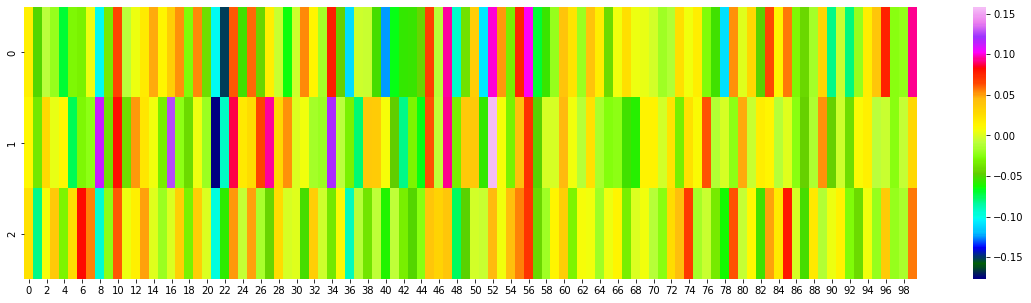

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize']=(20,5)
heatmap_plot = sns.heatmap(df, center=0, cmap='gist_ncar')

plt.show()

In [ ]:
from scipy.spatial.distance import cosine

In [ ]:
dictionary = {"змӕст":"анархический", "гемтъеры": "беспорядочный","цыбеӕлгӕнгӕ":"аппетитно", "мондаггӕнгӕ":"вкусно"}
sinonim = ([
           ["змӕст", "гемтъеры"],
           ["цыбеӕлгӕнгӕ", "мондаггӕнгӕ"]
 ])